In [1]:
import pandas as pd
import requests
import json
import time
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# defining the api-endpoint 
API_ENDPOINT = 'http://webapi.tanbih.org/article/propaganda/sentences'

In [3]:
# Load in the stored processed dataframe

french = pd.read_excel('french_processed.xlsx')
# religion_df = pd.read_excel('religion_processed.xlsx')
# religion_df = religion_df
# #display(religion_df.columns)
# display(religion_df.translated_text)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [6]:
print(len(french))

152


In [57]:
# Pre process df - remove the rows which are null on translated text
def prepare_df(df):
    for index, row in df.iterrows():
        if type(row['translated_text']) == float:
            #print('inside')
            df.drop(index, inplace=True)
    return df

In [13]:
french_new = prepare_df(french)
print(len(french_new))

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
96


In [48]:
# # Loop through dataframe, perform PRTA, save results
# PRTA_list = []
# key_list = []

# # Post
# tic = time.perf_counter()
# for article in french.translated_text:
#     data = {'text': article}
   
#     r = requests.post(url = API_ENDPOINT, headers={'X-Internal': 'true'}, data = data)
#     #print('Status Code: %s'%r)
#     returned_json = r.json()
#     sample_key = returned_json['key']
#     key_list.append(sample_key)
# tok = time.perf_counter()

In [49]:
   
# religion_df['PRTA Keys'] = key_list
# # display(religion_df['PRTA Keys'])
# print('Time for post requests:', tic-tok)

In [60]:
# Does all post requests - updates df, returns time and df
# TODO: Add the processing for summary and disproof
def get_PRTA_keys(df):
    # Loop through dataframe, perform PRTA, save results
    key_list = []

    # Post
    tic = time.perf_counter()
    for article in df.translated_text:
        data = {'text': article}

        r = requests.post(url = API_ENDPOINT, headers={'X-Internal': 'true'}, data = data)
        #print('Status Code: %s'%r)
        returned_json = r.json()
        sample_key = returned_json['key']
        key_list.append(sample_key)
    df['PRTA Keys'] = key_list
    tok = time.perf_counter()
    return tok-tic, df

In [15]:
get_PRTA_keys(french_new)

Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Code: <Response [200]>
Status Cod

(165.11885719999555,
      Unnamed: 0                      Countries        Date  \
 0            93    Central African Rep, Russia  2021-07-15   
 1           365                Ukraine, Russia  2021-06-22   
 2           654  Syria, US, Russia, UK, France  2021-05-22   
 3           873                     EU, Russia  2021-04-12   
 4          1039                  Syria, US, EU  2021-03-09   
 ..          ...                            ...         ...   
 142        7985        France, Ukraine, Russia  2019-02-13   
 143        8539                France, Ukraine  2018-06-11   
 145        9685                         France  2017-05-07   
 147        9961                        Ukraine  2017-03-02   
 149       10001                     US, Russia  2017-02-26   
 
                                        Disinfo summary Disinforming outlet(s)  \
 0    In July 2021, in the Central African Republic,...     fr.sputniknews.com   
 1    Crimea became a Russian region after a referen...  

In [18]:
#print(french_new['PRTA Keys'])

0      7a84e762-4097-11ec-8beb-6e0781bad58a
1      7d2bb072-4097-11ec-9c72-6e0781bad58a
2      7ee82ce2-4097-11ec-84d0-6e0781bad58a
3      7f63da36-4097-11ec-9522-6e0781bad58a
4      7fc8da76-4097-11ec-92a2-6e0781bad58a
                       ...                 
142    d8d09294-4097-11ec-b28e-6e0781bad58a
143    d97bbeee-4097-11ec-81a9-6e0781bad58a
145    d9d52164-4097-11ec-83cb-6e0781bad58a
147    db8c7034-4097-11ec-a516-6e0781bad58a
149    dc569fe4-4097-11ec-b20e-6e0781bad58a
Name: PRTA Keys, Length: 96, dtype: object


In [50]:
# #Get
# tic = time.perf_counter()
# for thing, article in religion_df.iterrows(): 
#     current_key = article['PRTA Keys'] 
#     parameters = {'key': current_key}
#     while True:
#         time.sleep(30) # sixty second delay
#         analyzed_output = requests.get(API_ENDPOINT, params= parameters)
#         if analyzed_output.status_code == 200:
#             analyzed_json = analyzed_output.json()
#             PRTA_list.append(analyzed_json)
#             break
#         else:
#             print ("File not ready, trying again in one minute")
# toc = time.perf_counter()
# # print(PRTA_list)
# religion_df['PRTA'] = PRTA_list
# print('Time for get requests', tic-toc)

In [51]:
# TODO: Add the PRTA for summaries and disproof
def get_PRTA_responses(df):
    PRTA_list = []
    #Get
    tic = time.perf_counter()
    for thing, article in df.iterrows(): 
        current_key = article['PRTA Keys'] 
        parameters = {'key': current_key}
        while True:
            time.sleep(30) # sixty second delay
            analyzed_output = requests.get(API_ENDPOINT, params= parameters)
            if analyzed_output.status_code == 200:
                analyzed_json = analyzed_output.json()
                PRTA_list.append(analyzed_json)
                break
            else:
                print ("File not ready, trying again in one minute")
    toc = time.perf_counter()
    # print(PRTA_list)
    df['PRTA'] = PRTA_list
#     print('Time for get requests', tic-toc)
    return toc-tic, df

In [25]:
time, french_new = get_PRTA_responses(french_new)

In [26]:
print(time)
display(french_new.columns)

2937.901553100004


Index(['Unnamed: 0', 'Countries', 'Date', 'Disinfo summary',
       'Disinforming outlet(s)', 'Disproof note', 'ID', 'Issue #', 'Keywords',
       'Language / Targeted audience', 'Link to the disinformation', 'Title',
       'URL', 'full_text', 'translated_text', 'summary_toks', 'disproof_toks',
       'title_toks', 'translated_toks', 'summary_nes', 'disproof_nes',
       'titles_nes', 'translated_nes', 'sss', 'dss', 'tss', 'fss', 'sfd',
       'dfd', 'tfd', 'ffd', 'disproof_pos', 'summary_pos', 'full_pos',
       'PRTA Keys', 'PRTA'],
      dtype='object')

In [27]:
display(french_new)

,Unnamed: 0,Countries,Date,Disinfo summary,Disinforming outlet(s),Disproof note,ID,Issue #,Keywords,Language / Targeted audience,...,fss,sfd,dfd,tfd,ffd,disproof_pos,summary_pos,full_pos,PRTA Keys,PRTA
0,93,"Central African Rep, Russia",2021-07-15,"In July 2021, in the Central African Republic,...",fr.sputniknews.com,Recurrent Pro-Kremlin disinformation message d...,128532,253,"foreign mercenaries, military, africa",french,...,"{'neg': 0.038, 'neu': 0.9, 'pos': 0.062, 'comp...",<FreqDist with 15 samples and 16 outcomes>,<FreqDist with 116 samples and 171 outcomes>,<FreqDist with 6 samples and 6 outcomes>,<FreqDist with 343 samples and 789 outcomes>,"[('Recurrent', 'JJ'), ('Pro-Kremlin', 'NNP'), ...","[('July', 'NNP'), ('2021', 'CD'), (',', ','), ...","[('<', 'JJ'), ('>', 'NNP'), ('Un', 'NNP'), ('d...",7a84e762-4097-11ec-8beb-6e0781bad58a,"{'content': '<div class=""technique"" id=""row0"">..."
1,365,"Ukraine, Russia",2021-06-22,Crimea became a Russian region after a referen...,fr.news-front.info,Disinformation around Crimea. No international...,128266,249,"crimea, illegal annexation, international law",french,...,"{'neg': 0.011, 'neu': 0.942, 'pos': 0.047, 'co...",<FreqDist with 48 samples and 67 outcomes>,<FreqDist with 130 samples and 182 outcomes>,<FreqDist with 4 samples and 4 outcomes>,<FreqDist with 284 samples and 742 outcomes>,"[('Disinformation', 'NN'), ('around', 'IN'), (...","[('Crimea', 'NNP'), ('became', 'VBD'), ('Russi...","[('<', 'JJ'), ('>', 'NNP'), ('L', 'NNP'), ('&'...",7d2bb072-4097-11ec-9c72-6e0781bad58a,{'content': '<div> &lt;i&gt;L&amp;#39;extensio...
2,654,"Syria, US, Russia, UK, France",2021-05-22,It has been possible to deprive Syria of its r...,fr.sputniknews.com,Recurrent disinformation message about Chemica...,127968,245,"opcw, chemical weapons/attack, bashar al-assad...",french,...,"{'neg': 0.073, 'neu': 0.881, 'pos': 0.046, 'co...",<FreqDist with 65 samples and 93 outcomes>,<FreqDist with 133 samples and 200 outcomes>,<FreqDist with 5 samples and 5 outcomes>,<FreqDist with 359 samples and 991 outcomes>,"[('Recurrent', 'JJ'), ('disinformation', 'NN')...","[('possible', 'JJ'), ('deprive', 'JJ'), ('Syri...","[('<', 'JJ'), ('>', 'NNP'), ('Paris', 'NNP'), ...",7ee82ce2-4097-11ec-84d0-6e0781bad58a,{'content': '<div> &lt;i&gt;Paris se félicite ...
3,873,"EU, Russia",2021-04-12,Russia sent the application for registration o...,fr.sputniknews.com,Pro-Kremlin disinformation narrative about vac...,127529,241,"sputnik v, vaccination, coronavirus, health",french,...,"{'neg': 0.0, 'neu': 0.997, 'pos': 0.003, 'comp...",<FreqDist with 34 samples and 41 outcomes>,<FreqDist with 106 samples and 168 outcomes>,<FreqDist with 11 samples and 11 outcomes>,<FreqDist with 201 samples and 793 outcomes>,"[('Pro-Kremlin', 'NNP'), ('disinformation', 'N...","[('Russia', 'NNP'), ('sent', 'VBD'), ('applica...","[('<', 'JJ'), ('>', 'NNP'), ('La', 'NNP'), ('R...",7f63da36-4097-11ec-9522-6e0781bad58a,{'content': '<div> &lt;i&gt;La Russie a envoyé...
4,1039,"Syria, US, EU",2021-03-09,We have to get out of the hypocrisy about Syri...,fr.sputniknews.com,Recurring pro-Kremlin disinformation narrative...,127185,239,"sanctions, human rights, un, bashar al-assad, ...",french,...,"{'neg': 0.058, 'neu': 0.922, 'pos': 0.02, 'com...",<FreqDist with 103 samples and 152 outcomes>,<FreqDist with 232 samples and 386 outcomes>,<FreqDist with 14 samples and 14 outcomes>,<FreqDist with 240 samples and 493 outcomes>,"[('Recurring', 'VBG'), ('pro-Kremlin', 'JJ'), ...","[('get', 'VB'), ('hypocrisy', 'JJ'), ('Syria',...","[('<', 'JJ'), ('>', 'NNP'), ('Victime', 'NNP')...",7fc8da76-4097-11ec-92a2-6e0781bad58a,{'content': '<div> &lt;i&gt;Victime d&amp;#39;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,7985,"France, Ukraine, Russia",2019-02-13,"Crimea, which has been Russian since 1783, was...",fr.sputniknews.com,The Office of the Prosecutor of the Internatio...,90820,132,"manipulated elections/referendum, cr

In [28]:
# display(religion_df)
# test_bed = religion_df.copy()

In [29]:
# Just copying the df here so I don't mess it up by accident
test_bed = french_new.copy()

In [8]:
#print(religion_df.iloc[0].PRTA.keys())

# Okay so the structure of the output is a dictionary with and key 'sentence propaganda'
# which contains a list of dicitionaries with keys 'confidence', 'prediction', 'tags', 'token_confidences', 'tokens'
# Where each key has a list that is indexed to be cosistent regarding the token, confidence level, and tag

# Note: Should make a copy of the DF and all the dicts to work with before editing - rerunning cells messes with the DF 

# Goal - to get all the stats related to the tagged parts of the document
# First step would be to append all the lists together to get one large dictionary, rather than a list of dictionaries
# Change dicitionaries into a DF (then we can make handy dandy heat maps and what not )
#print(religion_df.iloc[0].PRTA['sentence_propaganda'][0])
#print(type(religion_df.iloc[0].PRTA['sentence_propaganda'][0]['tags']))


In [9]:
# d0 = religion_df.iloc[0].PRTA['sentence_propaganda'][0].copy()
# print(d0)
# d1 = religion_df.iloc[0].PRTA['sentence_propaganda'][1].copy()
# print(d1)
# appended = d1 + d0
# print(appended)

In [52]:
# test_list = test_bed.iloc[0].PRTA['sentence_propaganda'].copy()
# print(test_bed.iloc[0])

In [11]:
# combined_dictionary = dict()
# for curr_dictionary in test_list:
#     #print(curr_dictionary)
#     for curr_key in curr_dictionary.keys():
#         #print(curr_key)
#         #print(curr_dictionary[curr_key])
#         if curr_key in combined_dictionary:
#             #print(combined_dictionary[curr_key])
#             combined_dictionary[curr_key].append(curr_dictionary[curr_key])
#             #print(combined_dictionary[curr_key])
#         else:
#             combined_dictionary[curr_key] = []
#             combined_dictionary[curr_key].append((curr_dictionary[curr_key]))
#             #combined_dictionary[curr_key] = combined_dictionary[curr_key] + list(curr_dictionary[curr_key])

In [31]:
# Data manipulation of PRTA Output to combine dictionarys
# TODO: Will also need to combine the dictionaries for PRTA of summaries and disproofs
def combine_PRTA_dict(df):
    list_of_keys = ['tags', 'token_confidences', 'tokens']
    list_of_PRTA_df =[]
    for item, article in df.iterrows():
        combined_dictionary = dict()
        final_dict = dict()
        article = article.PRTA['sentence_propaganda']
        # These for loops consolidate the dictionaries
        for curr_dictionary in article:
            for curr_key in curr_dictionary.keys():
                if curr_key in combined_dictionary:
                    combined_dictionary[curr_key].append(curr_dictionary[curr_key])
                else:
                    combined_dictionary[curr_key] = []
                    combined_dictionary[curr_key].append((curr_dictionary[curr_key]))
        #This for loops makes a final dictionary??
        for curr_key in list_of_keys:
            final_dict[curr_key] = list(itertools.chain.from_iterable(combined_dictionary[curr_key]))
        #Make a df
        PRTA_df = pd.DataFrame.from_dict(final_dict)
        list_of_PRTA_df.append(PRTA_df)
    df['PRTA Out'] = list_of_PRTA_df
    return df

In [32]:
test_bed = combine_PRTA_dict(test_bed)

In [34]:
display(test_bed)

,Unnamed: 0,Countries,Date,Disinfo summary,Disinforming outlet(s),Disproof note,ID,Issue #,Keywords,Language / Targeted audience,...,sfd,dfd,tfd,ffd,disproof_pos,summary_pos,full_pos,PRTA Keys,PRTA,PRTA Out
0,93,"Central African Rep, Russia",2021-07-15,"In July 2021, in the Central African Republic,...",fr.sputniknews.com,Recurrent Pro-Kremlin disinformation message d...,128532,253,"foreign mercenaries, military, africa",french,...,<FreqDist with 15 samples and 16 outcomes>,<FreqDist with 116 samples and 171 outcomes>,<FreqDist with 6 samples and 6 outcomes>,<FreqDist with 343 samples and 789 outcomes>,"[('Recurrent', 'JJ'), ('Pro-Kremlin', 'NNP'), ...","[('July', 'NNP'), ('2021', 'CD'), (',', ','), ...","[('<', 'JJ'), ('>', 'NNP'), ('Un', 'NNP'), ('d...",7a84e762-4097-11ec-8beb-6e0781bad58a,"{'content': '<div class=""technique"" id=""row0"">...",tags token_confidences tokens 0 ...
1,365,"Ukraine, Russia",2021-06-22,Crimea became a Russian region after a referen...,fr.news-front.info,Disinformation around Crimea. No international...,128266,249,"crimea, illegal annexation, international law",french,...,<FreqDist with 48 samples and 67 outcomes>,<FreqDist with 130 samples and 182 outcomes>,<FreqDist with 4 samples and 4 outcomes>,<FreqDist with 284 samples and 742 outcomes>,"[('Disinformation', 'NN'), ('around', 'IN'), (...","[('Crimea', 'NNP'), ('became', 'VBD'), ('Russi...","[('<', 'JJ'), ('>', 'NNP'), ('L', 'NNP'), ('&'...",7d2bb072-4097-11ec-9c72-6e0781bad58a,{'content': '<div> &lt;i&gt;L&amp;#39;extensio...,tags token_confidences tokens...
2,654,"Syria, US, Russia, UK, France",2021-05-22,It has been possible to deprive Syria of its r...,fr.sputniknews.com,Recurrent disinformation message about Chemica...,127968,245,"opcw, chemical weapons/attack, bashar al-assad...",french,...,<FreqDist with 65 samples and 93 outcomes>,<FreqDist with 133 samples and 200 outcomes>,<FreqDist with 5 samples and 5 outcomes>,<FreqDist with 359 samples and 991 outcomes>,"[('Recurrent', 'JJ'), ('disinformation', 'NN')...","[('possible', 'JJ'), ('deprive', 'JJ'), ('Syri...","[('<', 'JJ'), ('>', 'NNP'), ('Paris', 'NNP'), ...",7ee82ce2-4097-11ec-84d0-6e0781bad58a,{'content': '<div> &lt;i&gt;Paris se félicite ...,tags token_confidences tokens 0 O...
3,873,"EU, Russia",2021-04-12,Russia sent the application for registration o...,fr.sputniknews.com,Pro-Kremlin disinformation narrative about vac...,127529,241,"sputnik v, vaccination, coronavirus, health",french,...,<FreqDist with 34 samples and 41 outcomes>,<FreqDist with 106 samples and 168 outcomes>,<FreqDist with 11 samples and 11 outcomes>,<FreqDist with 201 samples and 793 outcomes>,"[('Pro-Kremlin', 'NNP'), ('disinformation', 'N...","[('Russia', 'NNP'), ('sent', 'VBD'), ('applica...","[('<', 'JJ'), ('>', 'NNP'), ('La', 'NNP'), ('R...",7f63da36-4097-11ec-9522-6e0781bad58a,{'content': '<div> &lt;i&gt;La Russie a envoyé...,tags token_confidences tokens 0 ...
4,1039,"Syria, US, EU",2021-03-09,We have to get out of the hypocrisy about Syri...,fr.sputniknews.com,Recurring pro-Kremlin disinformation narrative...,127185,239,"sanctions, human rights, un, bashar al-assad, ...",french,...,<FreqDist with 103 samples and 152 outcomes>,<FreqDist with 232 samples and 386 outcomes>,<FreqDist with 14 samples and 14 outcomes>,<FreqDist with 240 samples and 493 outcomes>,"[('Recurring', 'VBG'), ('pro-Kremlin', 'JJ'), ...","[('get', 'VB'), ('hypocrisy', 'JJ'), ('Syria',...","[('<', 'JJ'), ('>', 'NNP'), ('Victime', 'NNP')...",7fc8da76-4097-11ec-92a2-6e0781bad58a,{'content': '<div> &lt;i&gt;Victime d&amp;#39;...,tags token_confidences tokens 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,7985,"France, Ukraine, Russia",2019-02-13,"Crimea, which has been Russian since 1783, was...",fr.sputniknews.com,The Office of the Prosecutor of the Internatio...,90820,132,"manipulated elections/referendum, crimea, refe...",french,...,<FreqDist with 28 samples and 32 outcomes>,<FreqDist

In [36]:
# #print(combined_dictionary)
# list_of_keys = ['tags', 'token_confidences', 'tokens']
# final_dict = dict()
# for curr_key in list_of_keys:
#     final_dict[curr_key] = list(itertools.chain.from_iterable(combined_dictionary[curr_key]))

In [35]:
# print(final_dict)

In [53]:
# PRTA_df = pd.DataFrame.from_dict(final_dict)
# display(PRTA_df)

In [15]:
# temp_df = PRTA_df.loc[(PRTA_df['tags']!='O')]

In [16]:
# # show only the values labeled by PRTA
# display(temp_df)

,tags,token_confidences,tokens
93,Doubt,0.504371,place
95,Doubt,0.528501,Europe
97,Doubt,0.488176,this
99,Doubt,0.474202,World?
198,Loaded_Language,0.514478,are
199,Loaded_Language,0.807797,"profaned,"
203,Loaded_Language,0.603252,dissolvedin
204,Loaded_Language,0.680187,the
205,Loaded_Language,0.833392,„ice
206,Loaded_Language,0.868393,cold


In [133]:
#temp_df.plot.pie(y=temp_df['tags'].count)

In [17]:
# list_of_keys = ['tags', 'token_confidences', 'tokens']
# list_of_PRTA_df =[]
# #print(test_bed)
# for item, article in test_bed.iterrows():
#     combined_dictionary = dict()
#     final_dict = dict()
#     #print(article)
#     article = article.PRTA['sentence_propaganda']
#     # These for loops consolidate the dictionaries
#     for curr_dictionary in article:
#         #print(curr_dictionary)
#         for curr_key in curr_dictionary.keys():
#             #print(curr_key)
#             #print(curr_dictionary[curr_key])
#             if curr_key in combined_dictionary:
#                 #print(combined_dictionary[curr_key])
#                 combined_dictionary[curr_key].append(curr_dictionary[curr_key])
#                 #print(combined_dictionary[curr_key])
#             else:
#                 combined_dictionary[curr_key] = []
#                 combined_dictionary[curr_key].append((curr_dictionary[curr_key]))
#                 #combined_dictionary[curr_key] = combined_dictionary[curr_key] + list(curr_dictionary[curr_key])
#     #This for loops makes a final dictionary??
#     for curr_key in list_of_keys:
#         final_dict[curr_key] = list(itertools.chain.from_iterable(combined_dictionary[curr_key]))
#     #Make a df
#     PRTA_df = pd.DataFrame.from_dict(final_dict)
#     list_of_PRTA_df.append(PRTA_df)

In [54]:
# print(len(list_of_PRTA_df))

In [19]:
# test_bed['PRTA Out'] = list_of_PRTA_df

In [37]:
display(test_bed)

,Unnamed: 0,Countries,Date,Disinfo summary,Disinforming outlet(s),Disproof note,ID,Issue #,Keywords,Language / Targeted audience,...,sfd,dfd,tfd,ffd,disproof_pos,summary_pos,full_pos,PRTA Keys,PRTA,PRTA Out
0,93,"Central African Rep, Russia",2021-07-15,"In July 2021, in the Central African Republic,...",fr.sputniknews.com,Recurrent Pro-Kremlin disinformation message d...,128532,253,"foreign mercenaries, military, africa",french,...,<FreqDist with 15 samples and 16 outcomes>,<FreqDist with 116 samples and 171 outcomes>,<FreqDist with 6 samples and 6 outcomes>,<FreqDist with 343 samples and 789 outcomes>,"[('Recurrent', 'JJ'), ('Pro-Kremlin', 'NNP'), ...","[('July', 'NNP'), ('2021', 'CD'), (',', ','), ...","[('<', 'JJ'), ('>', 'NNP'), ('Un', 'NNP'), ('d...",7a84e762-4097-11ec-8beb-6e0781bad58a,"{'content': '<div class=""technique"" id=""row0"">...",tags token_confidences tokens 0 ...
1,365,"Ukraine, Russia",2021-06-22,Crimea became a Russian region after a referen...,fr.news-front.info,Disinformation around Crimea. No international...,128266,249,"crimea, illegal annexation, international law",french,...,<FreqDist with 48 samples and 67 outcomes>,<FreqDist with 130 samples and 182 outcomes>,<FreqDist with 4 samples and 4 outcomes>,<FreqDist with 284 samples and 742 outcomes>,"[('Disinformation', 'NN'), ('around', 'IN'), (...","[('Crimea', 'NNP'), ('became', 'VBD'), ('Russi...","[('<', 'JJ'), ('>', 'NNP'), ('L', 'NNP'), ('&'...",7d2bb072-4097-11ec-9c72-6e0781bad58a,{'content': '<div> &lt;i&gt;L&amp;#39;extensio...,tags token_confidences tokens...
2,654,"Syria, US, Russia, UK, France",2021-05-22,It has been possible to deprive Syria of its r...,fr.sputniknews.com,Recurrent disinformation message about Chemica...,127968,245,"opcw, chemical weapons/attack, bashar al-assad...",french,...,<FreqDist with 65 samples and 93 outcomes>,<FreqDist with 133 samples and 200 outcomes>,<FreqDist with 5 samples and 5 outcomes>,<FreqDist with 359 samples and 991 outcomes>,"[('Recurrent', 'JJ'), ('disinformation', 'NN')...","[('possible', 'JJ'), ('deprive', 'JJ'), ('Syri...","[('<', 'JJ'), ('>', 'NNP'), ('Paris', 'NNP'), ...",7ee82ce2-4097-11ec-84d0-6e0781bad58a,{'content': '<div> &lt;i&gt;Paris se félicite ...,tags token_confidences tokens 0 O...
3,873,"EU, Russia",2021-04-12,Russia sent the application for registration o...,fr.sputniknews.com,Pro-Kremlin disinformation narrative about vac...,127529,241,"sputnik v, vaccination, coronavirus, health",french,...,<FreqDist with 34 samples and 41 outcomes>,<FreqDist with 106 samples and 168 outcomes>,<FreqDist with 11 samples and 11 outcomes>,<FreqDist with 201 samples and 793 outcomes>,"[('Pro-Kremlin', 'NNP'), ('disinformation', 'N...","[('Russia', 'NNP'), ('sent', 'VBD'), ('applica...","[('<', 'JJ'), ('>', 'NNP'), ('La', 'NNP'), ('R...",7f63da36-4097-11ec-9522-6e0781bad58a,{'content': '<div> &lt;i&gt;La Russie a envoyé...,tags token_confidences tokens 0 ...
4,1039,"Syria, US, EU",2021-03-09,We have to get out of the hypocrisy about Syri...,fr.sputniknews.com,Recurring pro-Kremlin disinformation narrative...,127185,239,"sanctions, human rights, un, bashar al-assad, ...",french,...,<FreqDist with 103 samples and 152 outcomes>,<FreqDist with 232 samples and 386 outcomes>,<FreqDist with 14 samples and 14 outcomes>,<FreqDist with 240 samples and 493 outcomes>,"[('Recurring', 'VBG'), ('pro-Kremlin', 'JJ'), ...","[('get', 'VB'), ('hypocrisy', 'JJ'), ('Syria',...","[('<', 'JJ'), ('>', 'NNP'), ('Victime', 'NNP')...",7fc8da76-4097-11ec-92a2-6e0781bad58a,{'content': '<div> &lt;i&gt;Victime d&amp;#39;...,tags token_confidences tokens 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,7985,"France, Ukraine, Russia",2019-02-13,"Crimea, which has been Russian since 1783, was...",fr.sputniknews.com,The Office of the Prosecutor of the Internatio...,90820,132,"manipulated elections/referendum, crimea, refe...",french,...,<FreqDist with 28 samples and 32 outcomes>,<FreqDist

In [47]:
# Save PRTA results DF
test_bed.to_excel('french_PRTA_results.xlsx')

In [61]:
# Run above process of Arabic df
arabic = pd.read_excel('arabic_processed.xlsx')
print("The length of the Arabic df is:", len(arabic))
arabic_new = prepare_df(arabic)
print('The length without empty articles is:', len(arabic_new))
time_keys, arabic_new = get_PRTA_keys(arabic_new)
print('Time to get PRTA Keys', time_keys)
time_responses, arabic_new = get_PRTA_responses(arabic_new)
print('Time to process PRTA:', time)
test_bed_arabic = arabic_new.copy()
test_bed_arabic = combine_PRTA_dict(test_bed_arabic)
test_bed_arabic.to_excel('arabic_PRTA_results.xlsx')

The length of the Arabic df is: 215
The length without empty articles is: 104
Time to get PRTA Keys 165.45400329999393
Time to process PRTA: <module 'time' (built-in)>


In [62]:
print('Time to process PRTA:', time_responses)

Time to process PRTA: 3183.9091864000075


In [ ]:
# Run above process of Arabic df
russian = pd.read_excel('russian_processed.xlsx')
print("The length of the Russian df is:", len(russian))
russian_new = prepare_df(russian)
print('The length without empty articles is:', len(russian_new))
time_keys, russian_new = get_PRTA_keys(russian_new)
print('Time to get PRTA Keys', time_keys)
time_responses, russian_new = get_PRTA_responses(russian_new)
print('Time to process PRTA:', time_responses)
test_bed_russian = russian_new.copy()
test_bed_russian = combine_PRTA_dict(test_bed_russian)
test_bed_russian.to_excel('russian_PRTA_results.xlsx')

The length of the Russian df is: 5526
The length without empty articles is: 3169
Time to get PRTA Keys 6288.366761300014


In [ ]:
# Run above process of Russian df

In [ ]:
######
# All code below here is just trying to do some visualizations! 
# Most of it doesn't work - HELP hahah
######

In [21]:
#test_bed.to_excel('religion_PRTA_results.xlsx')

In [38]:
arg_counts =[]
for item, row in test_bed.iterrows():
    arg_counts.append(row['PRTA Out']['tags'].value_counts())
print(arg_counts)

[O              97
Flag-Waving     2
Name: tags, dtype: int64, O    85
Name: tags, dtype: int64, O    102
Name: tags, dtype: int64, O    75
Name: tags, dtype: int64, O    95
Name: tags, dtype: int64, O    95
Name: tags, dtype: int64, O    86
Name: tags, dtype: int64, O                        87
Name_Calling,Labeling     3
Name: tags, dtype: int64, O    94
Name: tags, dtype: int64, O    98
Name: tags, dtype: int64, O    100
Name: tags, dtype: int64, O    97
Name: tags, dtype: int64, O    73
Name: tags, dtype: int64, O    100
Name: tags, dtype: int64, O    87
Name: tags, dtype: int64, O    86
Name: tags, dtype: int64, O    83
Name: tags, dtype: int64, O    90
Name: tags, dtype: int64, O    91
Name: tags, dtype: int64, O    92
Name: tags, dtype: int64, O    104
Name: tags, dtype: int64, O                  75
Doubt               3
Loaded_Language     2
Name: tags, dtype: int64, O    94
Name: tags, dtype: int64, O    95
Name: tags, dtype: int64, O    86
Name: tags, dtype: int64, O    80
Nam

In [39]:
arg_counts.boxplot(column=arg_counts.values, by=index, ax=ax)

AttributeError: 'list' object has no attribute 'boxplot'

In [40]:
stacked_counts = pd.concat(arg_counts)

In [41]:
new= stacked_counts.groupby(stacked_counts.index, squeeze=True)
display(new)

<ipython-input-41-b9d7e9b0557c>:1: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  new= stacked_counts.groupby(stacked_counts.index, squeeze=True)


In [42]:
new.boxplot()

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'

In [43]:
plt_dict ={}
for key, item in new:
    curr_series_vals = new.get_group(key).values
    #print(type(curr_series))
    #print(key, curr_series.values, "\n\n")
    plt_dict[key]=curr_series_vals

In [44]:
print(plt_dict)
del plt_dict['O']
display(plt_dict)

{'Appeal_to_fear-prejudice': array([1], dtype=int64), 'Causal_Oversimplification': array([2], dtype=int64), 'Doubt': array([ 3,  4, 11,  4,  1,  1,  6,  6], dtype=int64), 'Flag-Waving': array([2], dtype=int64), 'Loaded_Language': array([2, 2, 2], dtype=int64), 'Name_Calling,Labeling': array([3, 6], dtype=int64), 'O': array([ 97,  85, 102,  75,  95,  95,  86,  87,  94,  98, 100,  97,  73,
       100,  87,  86,  83,  90,  91,  92, 104,  75,  94,  95,  86,  80,
        89,  93,  77,  91,  88, 105,  91,  74, 104, 103,  87,  96,  88,
        90,  85,  87, 103,  89,  85,  97,  83,  72,  80, 109,  80,  80,
        86,  98,  93,  93,  78,  80,  79,  93,  88,  91,  84,  81, 100,
        79,  85,  87,  79,  82,  82,  82,  88,  99,  78,  94,  83,  77,
        73,  78,  91,  93,  95,  45,  90,  85,  97,  77,  95,  78,  88,
        77, 100,  72,  93,  74], dtype=int64)}


{'Appeal_to_fear-prejudice': array([1], dtype=int64),
 'Causal_Oversimplification': array([2], dtype=int64),
 'Doubt': array([ 3,  4, 11,  4,  1,  1,  6,  6], dtype=int64),
 'Flag-Waving': array([2], dtype=int64),
 'Loaded_Language': array([2, 2, 2], dtype=int64),
 'Name_Calling,Labeling': array([3, 6], dtype=int64)}

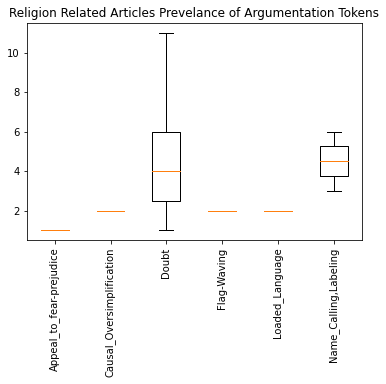

In [45]:
# Python 3.5+
labels, data = [*zip(*plt_dict.items())]  # 'transpose' items to parallel key, value lists


plt.boxplot(data)
plt.title('Religion Related Articles Prevelance of Argumentation Tokens')
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
plt.show()

In [126]:
#sns.boxplot(plt_dict, x=plt_dict.values, y=plt_dict.keys)

c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'bool' object has no attribute 'all'